# Ford GoBike System Data Exploration
## by Siqi Wan

## Investigation Overview

Overall goal is to communicate and share the findings from Ford GoBike system data.

## Dataset Overview

This dataset is Bay Wheels's trip data for public use. This data is provided according to the Bay Wheels License Agreement. The dataset including bike rental trip information and contains data 2017-2020/03

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.mode.chained_assignment = None 

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# load in the dataset into a pandas dataframe
path = '/Users/xiangyuli/Desktop/Udacity - DA/Project 4 - Data Visulization/Project Template/Rawdata/'
res = pd.DataFrame()
col_list = ['duration_sec', 'start_time', 'end_time', 'start_station_id',
           'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name',
           'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type']
for files in os.listdir(path):
    if '.csv' in files:
        data = pd.read_csv(path + files, header=1, usecols = col_list,names=col_list)
        res = pd.concat([data,res])
    

## Trip Duration distribution

#### From the trip duration distribution we can see:
1. the trip distribution is right skewed
2. The average trip duration: 671.88 and The median trip duration: 558.0

In [4]:
res['duration_sec'].describe()
# Only 1.8% of records has trip duration more than 3000, so deleting those records from the dataset.
res[res['duration_sec'] > 3000]['duration_sec'].value_counts().sum() / 5795383 * 100
less_than_3k = res[res['duration_sec'] <= 3000]

count   5795383.000
mean        849.313
std        2229.329
min          60.000
25%         360.000
50%         572.000
75%         893.000
max      912110.000
Name: duration_sec, dtype: float64

2.005855350716251

The average trip duration: 677.4310671552856
The median trip duration: 562.0


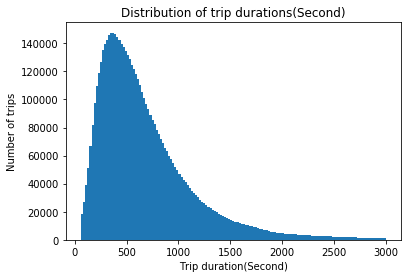

In [5]:
p = plt.hist(less_than_3k['duration_sec'], bins = np.arange(60, less_than_3k['duration_sec'].max() + 1, 20))
xlabel = plt.xlabel('Trip duration(Second)')
ylabel = plt.ylabel('Number of trips')
title = plt.title('Distribution of trip durations(Second)')
print("The average trip duration: " + str(less_than_3k['duration_sec'].mean()))
print("The median trip duration: " + str(less_than_3k['duration_sec'].median()))

## Trip Duration distribution among different user types - suscriber vs customer.

#### From above distribution we observed:
1. Subscribers and customer trip duration distribution are all right skewed with majority trip duration around 500 seconds.
2. Our dataset has more subscriber data points compares to customer data points.
3. With the trip duration increase, the delta between number of trips for subscriber vs customer is not obvious anymore. This could because:
    a. lack of data(less than 5000 records)
    b. it is also possbile that for users that trips more than 1500 seconds, there is not difference in the number of subscriber trips and customer trips.

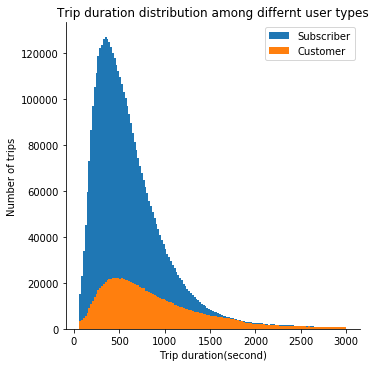

In [9]:
# Plot distribution among different user types
g = sb.FacetGrid(data = less_than_3k, hue = 'user_type',height = 5)
bins = np.arange(60, less_than_3k['duration_sec'].max() + 1, 20)
p = g.map(plt.hist,'duration_sec',bins = bins)
legend = plt.legend()
xlabel = plt.xlabel('Trip duration(second)')
ylabel = plt.ylabel('Number of trips')
title = plt.title('Trip duration distribution among differnt user types')


##  When are most trips taken in terms of time of day, day of the week, or month of the year?
#### From the above plot we can conclude:
1. Most trips are taken in March, Sept and Oct.
2. Most trips are taken on Tuesday, Wednesday and Thursday, which make sense since these days are busy working days.
3. Peak hours for trips are 7-9am and 16-19pm, which also make sense about since these are commuting hours.


In [7]:
## Data prep: Adding the month, year, dayofweek, hour column into dataset
less_than_3k['month'] = pd.to_datetime(less_than_3k['start_time']).dt.month
less_than_3k['year'] = pd.to_datetime(less_than_3k['start_time']).dt.year
less_than_3k['dayofweek'] = pd.to_datetime(less_than_3k['start_time']).dt.day_name()
less_than_3k['hour'] = pd.to_datetime(less_than_3k['start_time']).dt.hour


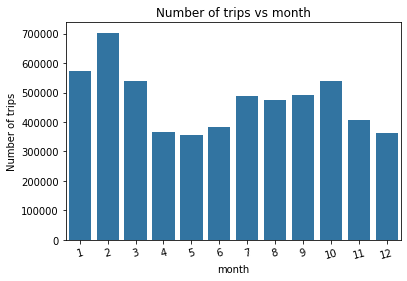

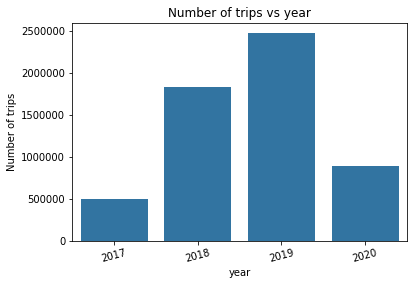

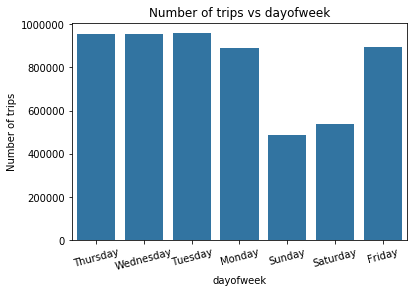

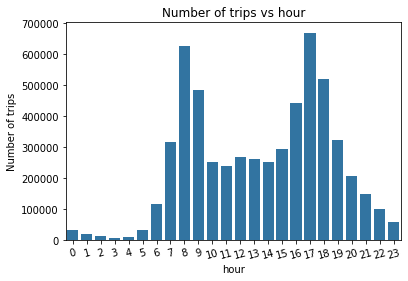

In [8]:
column_list = ['month','year','dayofweek','hour']
for i in column_list:
    base_color = sb.color_palette()[0]
    p = sb.countplot(data=less_than_3k, x = i ,color = base_color)
    title = plt.title('Number of trips vs ' + i)
    ylabel = plt.ylabel('Number of trips')
    xticks = plt.xticks(rotation=15)
    plt.show()